# Install Library Beautiful Soup

In [2]:
import sys
!{sys.executable} -m pip install bs4

# Source Code Web Scrape

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from datetime import date
import datetime
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.stats.api
import statsmodels.formula.api

today = date.today()
today=date.strftime(today,'%d/%m/%Y')
urlheader = {
    "User-Agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Mobile Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}
filename=['D:\BTC_USD Bitfinex Historical Data.csv'] #Pastikan sesuai dengan tempat Directory penyimpanan file yang sudah kalian download
url = "https://www.investing.com/instruments/HistoricalDataAjax"


for each in filename:
    with open(each, 'r') as readFile:
        reader = csv.reader(readFile)
        lines = list(reader)
    startdate=lines[1][0]
    startdate=datetime.datetime.strptime(startdate,'%d-%b-%y')
    startdate += datetime.timedelta(days=1)
    startdate=startdate.strftime('%d/%m/%Y')
    readFile.close()
    if (each == 'D:\BTC_USD Bitfinex Historical Data.csv'): #Pastikan sesuai dengan tempat Directory penyimpanan file yang sudah kalian download 
        header="BTC/USD Bitfinex Historical Data"
        curr_id="945629"
        smlID= "145284"
        column_name='BTC Price'
 
    payload = {'header': header, 
               'st_date': startdate, 'end_date': today, 
               'sort_col': 'date', 'action': 'historical_data', 
               'smlID': smlID, 'sort_ord': 'DESC', 'interval_sec': 'Daily', 'curr_id': curr_id}

    req = requests.post(url, headers=urlheader, data=payload)
    soup = BeautifulSoup(req.content, "lxml")
    table = soup.find('table', id="curr_table")
    split_rows = table.find_all("tr")
    rows = table.findAll('tr')
    header_text = []
    headers = rows[0]
    
    
    for th in headers.findAll('th'):
        header_text.append(th.text)
        
    del header_text[2:]
    
    row_text_array = []
    for row in rows[1:]:
        row_text = []
        for row_element in row.findAll(['th', 'td']):
            row_text.append(row_element.text.replace('\n', '').strip())
        del row_text[2:]
        row_text_array.append(row_text)
    
    df = pd.read_csv(each)
    
    df1 = pd.DataFrame(row_text_array)
    
    df1.rename(columns={0:'Date',1:column_name}, inplace=True)
    df=df.append(df1,sort=False)
    df=df.dropna()
    df['Date']= pd.to_datetime(df['Date'])
    df = df.sort_values('Date',ascending=False)
    
    df['Date']= df['Date'].dt.strftime('%d-%b-%y')
    print(df.head(3))
    df.to_csv(each,index=False)

        Date     Price      Open      High       Low   Vol. Change %
0  12-Oct-21  55,967.0  57,468.0  57,633.0  54,000.0  5.94K   -2.61%
1  11-Oct-21  57,468.0  54,701.0  57,802.5  54,430.0  7.51K    5.06%
2  10-Oct-21  54,701.0  54,978.0  56,414.0  54,173.0  5.84K   -0.50%


In [8]:
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,12-Oct-21,"55,967.0","57,468.0","57,633.0","54,000.0",5.94K,-2.61%
1,11-Oct-21,"57,468.0","54,701.0","57,802.5","54,430.0",7.51K,5.06%
2,10-Oct-21,"54,701.0","54,978.0","56,414.0","54,173.0",5.84K,-0.50%
3,09-Oct-21,"54,978.0","53,925.0","55,443.7","53,711.0",2.44K,1.95%


In [9]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3537,3537,3537,3537,3537,3537,3537
unique,3537,3055,3044,3003,3019,1923,1323
top,16-Jun-13,5.1,5.1,5.1,5.1,-,0.00%
freq,1,26,26,26,26,660,135


In [10]:
df.shape

(3537, 7)

In [11]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3537 non-null   object
 1   Price     3537 non-null   object
 2   Open      3537 non-null   object
 3   High      3537 non-null   object
 4   Low       3537 non-null   object
 5   Vol.      3537 non-null   object
 6   Change %  3537 non-null   object
dtypes: object(7)
memory usage: 221.1+ KB


In [13]:
#Ubah tipe data kolom yg diperlukan
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

In [ ]:
#df[['Price', 'Open', 'High', 'Low']] = df[['Price', 'Open', 'High', 'Low']].str.replace(',', '').astype(float)

In [14]:
#Menampilkan n data sebenarnya
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-10-12,55967.0,57468.0,57633.0,54000.0,5.94K,-2.61%
1,2021-10-11,57468.0,54701.0,57802.5,54430.0,7.51K,5.06%
2,2021-10-10,54701.0,54978.0,56414.0,54173.0,5.84K,-0.50%
3,2021-10-09,54978.0,53925.0,55443.7,53711.0,2.44K,1.95%


In [15]:
#MEnampilkan informasi df yg sebenarnya
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3537 non-null   datetime64[ns]
 1   Price     3537 non-null   float64       
 2   Open      3537 non-null   float64       
 3   High      3537 non-null   float64       
 4   Low       3537 non-null   float64       
 5   Vol.      3537 non-null   object        
 6   Change %  3537 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 221.1+ KB


In [16]:
#22.	Menampilkan deskripsi data frame sebenarnya
df.describe()

,Price,Open,High,Low
count,3537.000000,3537.000000,3537.000000,3537.000000
mean,6882.461634,6867.310913,7060.137235,6665.764461
std,12350.527632,12323.964251,12664.826666,11971.606851
min,4.200000,4.200000,4.200000,4.200000
25%,273.300000,273.300000,279.600000,267.300000
50%,872.600000,871.400000,901.500000,833.700000
75%,8230.100000,8230.000000,8423.500000,8019.700000
max,63518.000000,63518.000000,64374.000000,62348.000000


In [17]:
#23.	Membuat variabel berdasarkan kelompok tanggal
avgp = df.groupby('Date')['Price'].mean()

In [18]:
x = avgp.index
y = avgp.values


Text(0.5, 1.0, 'Pergerakan Harga Bitcoin')

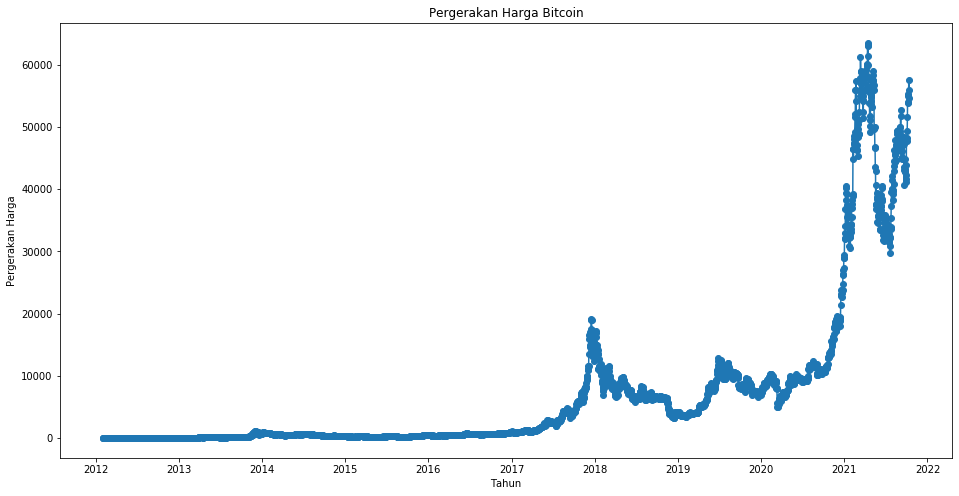

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Tahun')
plt.ylabel('Pergerakan Harga')
plt.title('Pergerakan Harga Bitcoin')

In [20]:
#26. Mencari prediksi rata-rata harga tahun 2021 menggunakan regresi linier
linreg = LinearRegression()
x=np.array(x).reshape(-1,1)
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
P_2021 = np.array(2021).reshape(-1,1)
pred_P = linreg.predict(P_2021)

In [22]:
print('Prediksi rata-rata harga tahun 2021 = ', pred_P.item())

Prediksi rata-rata harga tahun 2021 =  -134175.51652720835


In [23]:
#27.	Mencari ikhtisar regresi berganda dari pengaruh Harga tinggi dan Harga buka terhadap Harga
regB = statsmodels.formula.api.ols('Price~High+Open', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.907e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:29:27   Log-Likelihood:                -25989.
No. Observations:                3537   AIC:                         5.198e+04
Df Residuals:                    3534   BIC:                         5.200e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0074      7.236      0.139      0.8

# Latihan 2

In [25]:
#1.	Cari model peluang regresi berganda dari pengaruh harga tinggi dan harga rendah terhadap harga
regB = statsmodels.formula.api.ols('Price~High+Low', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.702e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:29:36   Log-Likelihood:                -25373.
No. Observations:                3537   AIC:                         5.075e+04
Df Residuals:                    3534   BIC:                         5.077e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0150      6.080      0.331      0.7

In [27]:
#2.	Cari model peluang regresi berganda dari pengaruh harga rendah dan harga buka terhadap harga
regB = statsmodels.formula.api.ols('Price~Low+Open', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.539e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:30:45   Log-Likelihood:                -26368.
No. Observations:                3537   AIC:                         5.274e+04
Df Residuals:                    3534   BIC:                         5.276e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6766      8.054      1.077      0.2

In [28]:
#3.	Cari model peluang regresi berganda dari pengaruh harga tinggi dan harga terhadap harga buka
regB = statsmodels.formula.api.ols('Open~High+Price', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.917e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:31:36   Log-Likelihood:                -25972.
No. Observations:                3537   AIC:                         5.195e+04
Df Residuals:                    3534   BIC:                         5.197e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7207      7.202      0.100      0.9

In [29]:
#4.	Cari model peluang regresi berganda dari pengaruh harga rendah dan harga terhadap harga buka
regB = statsmodels.formula.api.ols('Open~Low+Price', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.180e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:32:20   Log-Likelihood:                -26830.
No. Observations:                3537   AIC:                         5.367e+04
Df Residuals:                    3534   BIC:                         5.368e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3176      9.176      1.015      0.3